# Using CNN on the MNIST dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

## Loading Dataset

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_test.shape

(10000,)

In [6]:
X_test.shape

(10000, 28, 28)

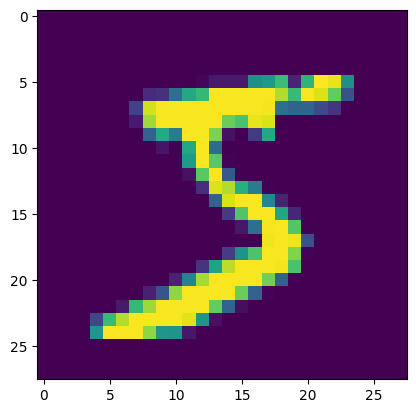

In [7]:
plt.imshow(X_train[0])

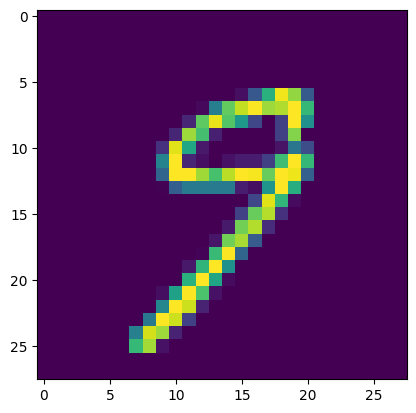

In [8]:
plt.imshow(X_train[-8])

## Reshaping the X_train and X_test to match models inputs

In [9]:
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

## Normalizing the dataset

In [10]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

## Building the CNN

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

In [13]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 23s 8ms/step - loss: 0.1680 - accuracy: 0.9470 - val_loss: 0.0445 - val_accuracy: 0.9870
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0471 - accuracy: 0.9862 - val_loss: 0.0470 - val_accuracy: 0.9851
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0364 - accuracy: 0.9898 - val_loss: 0.0349 - val_accuracy: 0.9891
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0283 - accuracy: 0.9919 - val_loss: 0.0379 - val_accuracy: 0.9903
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0247 - accuracy: 0.9933 - val_loss: 0.0397 - val_accuracy: 0.9914
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0208 - accuracy: 0.9944 - val_loss: 0.0316 - val_accuracy: 0.9921
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0186 - accuracy: 0.9951 - val_loss: 0.0406 - val_accura

In [15]:
model.evaluate(x=X_test, y=y_test)[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.0530 - accuracy: 0.9899


0.9898999929428101

## Visualizing Losses and Accuracy

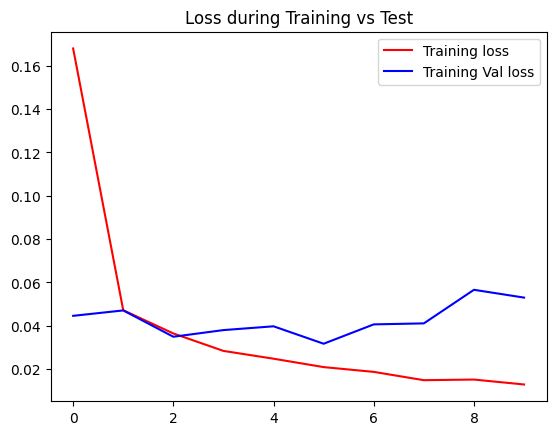

In [16]:
plt.title('Loss during Training vs Test')
plt.plot(history.history['loss'], color='red', label = 'Training loss')
plt.plot(history.history['val_loss'], color='blue', label = 'Training Val loss')
plt.legend()
plt.show()

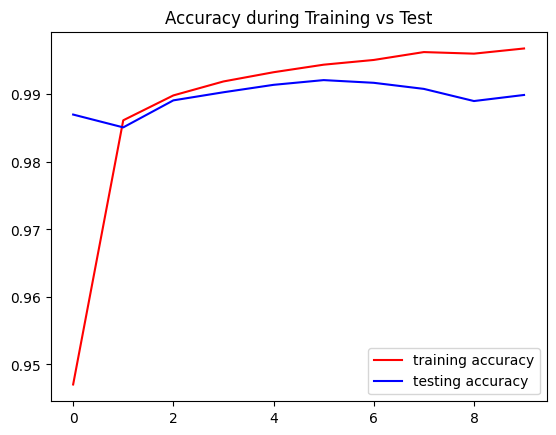

In [17]:
plt.title('Accuracy during Training vs Test')
plt.plot(history.history['accuracy'], color='red', label='training accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='testing accuracy')
plt.legend()
plt.show()

In [18]:
model.save('cnn_mnist.h5')